# 5. Exploring genetic algorithms

Let's explore existing genetic algorithms implementations in Python, and then use them in a new third model.

## Search

[This Google search was conducted](https://www.google.com/search?q=python+genetic+algorithm&sca_esv=576325651&ei=e3E4ZfXZGLzN1sQPnv-KyAg&ved=0ahUKEwi1g-WMiJCCAxW8ppUCHZ6_AokQ4dUDCBA&uact=5&oq=python+genetic+algorithm&gs_lp=Egxnd3Mtd2l6LXNlcnAiGHB5dGhvbiBnZW5ldGljIGFsZ29yaXRobTIFEAAYgAQyBRAAGIAEMgYQABgHGB4yBhAAGAcYHjIGEAAYBxgeMgYQABgHGB4yBhAAGAcYHjIEEAAYHjIEEAAYHjIEEAAYHkjkEVCAC1iMDnABeAGQAQCYAYgBoAHlBaoBAzAuNrgBA8gBAPgBAcICChAAGEcY1gQYsAPiAwQYACBBiAYBkAYI&sclient=gws-wiz-serp) on 2023-10-24. The following libraries were found:

* [PyGAD](https://pygad.readthedocs.io/en/latest/)
* [geneticalgorithm](https://pygad.readthedocs.io/en/latest/)

**The first one seems to be more complete**. Let's try it.

## Exploring

The next cells are simply replicating the step-by-step tutorial available [here](https://pygad.readthedocs.io/en/latest/).

As a supporting material, we also have [this article](https://www.linkedin.com/pulse/genetic-algorithm-implementation-python-ahmed-gad/), which was found 

In [11]:
import pygad
import numpy as np

In [6]:
function_inputs = [4,-2,3.5,5,-11,-4.7]
desired_output = 44

In [12]:
def fitness_func(ga_instance, solution, solution_idx):
    output = np.sum(solution*function_inputs)
    fitness = 1.0 / np.abs(output - desired_output)
    return fitness

In [21]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 6

sol_per_pop = 8
num_genes = len(function_inputs)

init_range_low = -2
init_range_high = 5

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

In [22]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

c:\Users\Edgard\AppData\Local\Programs\Python\Python39\lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resutled in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")


In [23]:
ga_instance.run()

In [24]:
ga_instance.best_solution()

(array([ 1.33288084, -1.34630045,  0.14312708,  4.49603351, -2.08880816,
         2.11414911]),
 21.917572817548862,
 0)

In [25]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

prediction = np.sum(np.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

Parameters of the best solution : [ 1.33288084 -1.34630045  0.14312708  4.49603351 -2.08880816  2.11414911]
Fitness value of the best solution = 21.917572817548862
Predicted output based on the best solution : 44.04562549002686


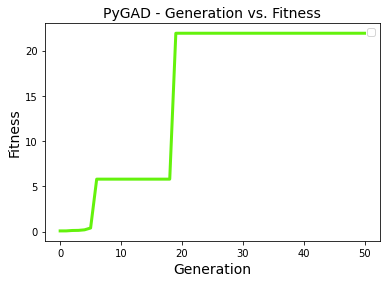

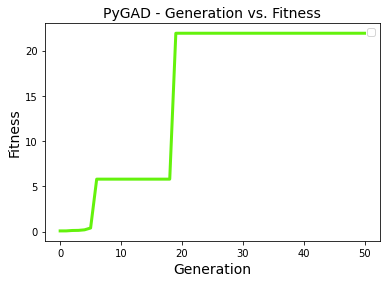

In [26]:
ga_instance.plot_fitness()